# Introductory applied machine learning (INFR10069) 

# Lab 3: Support Vector Machine (SVM) Classification and Evaluation

In this lab we initially re-examine the spam filtering problem from Lab 2. This time, we train a Logistic Regression model and a linear Support Vector Machine for the spam or non-spam classification task. In the second part of the lab we examine classification evaluation by using a K-nearest neighbour classifier.


All the datasets that you will need for this lab are located at the `./datasets` directory which is adjacent to this file.

In [1]:
# Import packages
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
KNeighboursClassifier = KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
%matplotlib inline

## 1. Spam filtering

### ========== Question 1.1 ==========
Load `spambase_binary.csv` into a pandas DataFrame structure called `spambase`. Display the number of instances and attributes and the first 5 samples. Remember that the attributes have been binarised. The instances have also been shuffled (i.e. their order has been randomised). 

In [2]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'spambase_binary.csv')
spambase_binary = pd.read_csv(data_path, delimiter = ',')
spambase_binary[:5]

,word_freq_make_binarized,word_freq_address_binarized,word_freq_all_binarized,word_freq_3d_binarized,word_freq_our_binarized,word_freq_over_binarized,word_freq_remove_binarized,word_freq_internet_binarized,word_freq_order_binarized,word_freq_mail_binarized,...,word_freq_edu_binarized,word_freq_table_binarized,word_freq_conference_binarized,char_freq_;_binarized,char_freq_(_binarized,char_freq_[_binarized,char_freq_!_binarized,char_freq_$_binarized,char_freq_#_binarized,is_spam
0,0,1,0,0,1,0,1,1,0,1,...,0,0,0,0,1,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


### ========== Question 1.2 ==========
We are going to use hold-out validation to evaluate our models below. Split the dataset into training and testing subsets; there is a [built-in sklearn function](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.train_test_split.html) to do this. Call the resulting matrices `X_train`, `X_test`, `y_train`, `y_test`. Use 90% of the data for training and the remaining 10% for testing. Make sure you don't include the target variable `is_spam` in the input features (`X_train` / `X_test`)!

If you want to be able to reproduce your results exactly, what argument must you remember to set?

In [3]:
X = spambase_binary.drop(['is_spam'],1).values
y = spambase_binary['is_spam'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

random_state = 0 ?

### ========== Question 1.3 ==========
Train a [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier by using training data. Use the `lbfgs` solver and default settings for the other parameters. Report the classification accuracy on both the training and test sets. Does your classifier generalise well on unseen data?

In [4]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train,y_train)
print("Score on training data: ",lr.score(X_train,y_train))
print("Score on testing data: ",lr.score(X_test,y_test))

Score on training data:  0.935024154589
Score on testing data:  0.9284164859


Not fo' sho'

### ========== Question 1.4 ==========
Print the coefficients for class 1 for the attributes `word_freq_hp_binarized` and `char_freq_$_binarized`. Generally, we would expect the string `$` to appear in spam, and the string `hp` to appear in non-spam e-mails, as the data was collected from HP Labs. Do the regression coefficients make sense given that class 1 is spam? *Hint: Consider the sigmoid function and how it transforms values into a probability between 0 and 1. Since our attributes are boolean, a positive coefficient can only increase the total sum fed through the sigmoid and thus move the output of the sigmoid towards 1. What can happen if we have continuous, real-valued attributes?*

In [5]:
i1 = spambase_binary.columns.get_loc('word_freq_hp_binarized')
i2 = spambase_binary.columns.get_loc('char_freq_$_binarized')
print(lr.coef_[0,i1])
print(lr.coef_[0,i2])

-2.63934720019
1.69864273325


hp is not and $ is yes?

### ========== Question 1.5 ==========
Train a [`LinearSVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) (i.e. Linear Support Vector classifier) by using default parameters. Report the classification accuracy on the training and test sets. 

In [6]:
lsvc = LinearSVC()
lsvc.fit(X_train,y_train)
print("Score on training data: ",lsvc.score(X_train,y_train))
print("Score on testing data: ",lsvc.score(X_test,y_test))

Score on training data:  0.934541062802
Score on testing data:  0.919739696312


### ========== Question 1.6 ==========
What are the coefficients for the attributes `word_freq_hp_binarized` and `char_freq_`$`_binarized`? Compare these to the ones you found with Logistic Regression.

In [7]:
i1 = spambase_binary.columns.get_loc('word_freq_hp_binarized')
i2 = spambase_binary.columns.get_loc('char_freq_$_binarized')
print(lsvc.coef_[0,i1])
print(lsvc.coef_[0,i2])

-0.856771526092
0.569355016342


kinda same but smaller

### ========== Question 1.7 ==========
How does a linear SVM relate to Logistic Regression? *Hint: Consider the classification boundary learnt in each model.*

Both have linear boundaries?

### ========== Question 1.8 ==========
By using the [`SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) class train two new support vector classifiers with Gaussian (`rbf`) and polynomial (`poly`) kernels. Again, report classification accuracies on training and test sets and compare with your results from Question 1.5.

In [8]:
svc1 = SVC(kernel='rbf')
svc1.fit(X_train,y_train)
print("RBF Score on training data: ",svc1.score(X_train,y_train))
print("RBF Score on testing data: ",svc1.score(X_test,y_test))
svc2 = SVC(kernel='poly')
svc2.fit(X_train,y_train)
print("POLY Score on training data: ",svc2.score(X_train,y_train))
print("POLY Score on testing data: ",svc2.score(X_test,y_test))

RBF Score on training data:  0.934299516908
RBF Score on testing data:  0.930585683297
POLY Score on training data:  0.800241545894
POLY Score on testing data:  0.809110629067


RBF better POLY worse

# 2. Performance assessment
We will now look at a few ways of assessing the performance of a classifier. To do so we will introduce a new data set, the [Splice](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) data set. The classification task is to identify `intron` and `exon` boundaries on gene sequences. For more information, you can read the dataset description in the link. The class attribute can take on 3 values: `N`, `IE` and `EI`.

### ========== Question 2.1 ==========
Load the `splice_train.csv` and `splice_test.csv` into two separate dataframes. Display the shape and first 10 instances for each dataframe.

In [9]:
data_path = os.path.join(os.getcwd(), 'datasets', 'splice_train.csv')
splice_train = pd.read_csv(data_path, delimiter = ',')
print(splice_train[:10])
print(splice_train.shape)
data_path = os.path.join(os.getcwd(), 'datasets', 'splice_test.csv')
splice_test = pd.read_csv(data_path, delimiter = ',')
print(splice_test[:10])
print(splice_test.shape)

  pos0 pos1 pos2 pos3 pos4 pos5 pos6 pos7 pos8 pos9  ...  pos51 pos52 pos53  \
0    T    G    A    T    G    C    C    T    G    C  ...      C     C     C   
1    G    C    C    C    A    T    A    T    T    C  ...      T     G     G   
2    G    G    C    T    G    C    C    G    G    A  ...      A     C     T   
3    C    T    G    C    T    G    C    T    G    G  ...      G     G     C   
4    T    C    C    C    C    G    A    G    C    C  ...      A     T     C   
5    A    T    A    C    C    T    G    C    C    C  ...      A     T     G   
6    T    T    C    T    C    C    A    T    T    T  ...      G     A     T   
7    A    A    A    G    A    T    G    A    T    A  ...      A     A     G   
8    C    C    A    A    T    C    C    C    A    G  ...      G     G     C   
9    G    C    C    G    T    G    G    T    T    T  ...      A     A     G   

  pos54 pos55 pos56 pos57 pos58 pos59 class  
0     C     C     T     G     A     G     N  
1     A     C     T     T     C     C 

### ========== Question 2.2 ========== 
Convert the categorical attributes into numeric ones by using the [`LabelEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) tool. Make sure to not transform the target variable (`class`).

In [10]:
for column in splice_train.drop(['class'], axis=1):  
    le = LabelEncoder().fit(splice_train[column])
    splice_train[column] = le.transform(splice_train[column])
    splice_test[column] = le.transform(splice_test[column])

### ========== Question 2.3 ==========
Store the training and testing data into numpy arrays `X_train`, `y_train`, `X_test` and `y_test`. Display the shapes of the four arrays.

In [11]:
X_train = splice_train.drop(['class'],1).values
y_train = splice_train['class'].values
X_test = splice_test.drop(['class'],1).values
y_test = splice_test['class'].values
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2935, 60)
(2935,)
(255, 60)
(255,)


### ========== Question 2.4 ==========
Familiarise yourself with [Nearest Neighbours Classification](http://scikit-learn.org/stable/modules/neighbors.html#classification). Use a [`KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
by using a single neighbour. Report the classification accuracy on the training set.

In [12]:
kfc = KNeighborsClassifier(n_neighbors=1)
kfc.fit(X_train,y_train)
print(kfc.score(X_train,y_train))

0.999659284497


### ========== Question 2.5 ==========
Is the above result meaningful? Why is testing on the training data a particularly bad idea for a 1-nearest neighbour classifier? Do you expect the performance of the classifier on a test set to be as good?

Not much. It's bad because 100% accuracy. Not sure.

### ========== Question 2.6 ==========
Now report the classification accuracy on the test set and check your expectations.

In [13]:
print(kfc.score(X_test,y_test))

0.611764705882


### ========== Question 2.7 ==========
Plot a histogram of the target variable (i.e. `class`) in the test set. *Hint: matplotlib won't allow you to plot a histogram for categorical values. Instead, you can use Pandas bulit-in bar plot tool in conjunction with the [`value_counts`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html). 

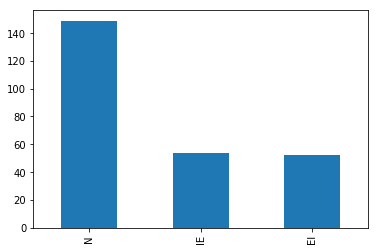

In [14]:
splice_test['class'].value_counts().plot(kind="bar")
plt.show()

### ========== Question 2.8 ==========
What would be the accuracy of the classifier, if all points were labelled as `N`? 

**Pro Tip** - You should always use a ['Dummy Model'](http://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators) (a ridiculously simple model) like this to compare with your 'real' models. It's very common for complex models to be outperformed by a simple model, such as predicting the most common class. When complex models are outperformed by 'Dummies', you should investigate why: often there was an issue with the code, the data, or the way the model works was misunderstood.

In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(np.full(len(y_train),'N'),y_train))

0.513117546848


### ========== Question 2.9 ==========
Now we want to explore the effect of the `k` parameter. To do this, train the classifier multiple times, each time setting the KNN option to a different value. Try `5`, `10`, `50`, `100`, `200`, `500`, `1000`, `1500` and `2000` and test the classifier on the test set. How does the k parameter effect the results? *Hint: Consider how well the classifier is generalising to previously unseen data, and how it compares to the dumb prediction accuracy.*

In [16]:
kfc = KNeighborsClassifier(n_neighbors=5)
kfc.fit(X_train,y_train)
kfc5s = kfc.score(X_test,y_test)
print("when neighbors = 5 :",kfc.score(X_test,y_test))
kfc = KNeighborsClassifier(n_neighbors=10)
kfc.fit(X_train,y_train)
kfc10s = kfc.score(X_test,y_test)
print("when neighbors = 10 :",kfc.score(X_test,y_test))
kfc = KNeighborsClassifier(n_neighbors=50)
kfc.fit(X_train,y_train)
kfc50s = kfc.score(X_test,y_test)
print("when neighbors = 50 :",kfc.score(X_test,y_test))
kfc = KNeighborsClassifier(n_neighbors=100)
kfc.fit(X_train,y_train)
kfc100s = kfc.score(X_test,y_test)
print("when neighbors = 100 :",kfc.score(X_test,y_test))
kfc = KNeighborsClassifier(n_neighbors=200)
kfc.fit(X_train,y_train)
kfc200s = kfc.score(X_test,y_test)
print("when neighbors = 200 :",kfc.score(X_test,y_test))
kfc = KNeighborsClassifier(n_neighbors=500)
kfc.fit(X_train,y_train)
kfc500s = kfc.score(X_test,y_test)
print("when neighbors = 500 :",kfc.score(X_test,y_test))
kfc = KNeighborsClassifier(n_neighbors=1000)
kfc.fit(X_train,y_train)
kfc1000s = kfc.score(X_test,y_test)
print("when neighbors = 1000 :",kfc.score(X_test,y_test))
kfc = KNeighborsClassifier(n_neighbors=1500)
kfc.fit(X_train,y_train)
kfc1500s = kfc.score(X_test,y_test)
print("when neighbors = 1500 :",kfc.score(X_test,y_test))
kfc = KNeighborsClassifier(n_neighbors=2000)
kfc.fit(X_train,y_train)
kfc2000s = kfc.score(X_test,y_test)
print("when neighbors = 2000 :",kfc.score(X_test,y_test))

when neighbors = 5 : 0.643137254902
when neighbors = 10 : 0.654901960784
when neighbors = 50 : 0.682352941176
when neighbors = 100 : 0.662745098039
when neighbors = 200 : 0.666666666667
when neighbors = 500 : 0.690196078431
when neighbors = 1000 : 0.694117647059
when neighbors = 1500 : 0.58431372549
when neighbors = 2000 : 0.58431372549


about 500 gives best result, but low average.

### ========== Question 2.10 ==========
Plot the results (k-value on the x-axis and classification accuracy on the y-axis), making sure to mark the axes. Can you conclude anything from observing the plot?

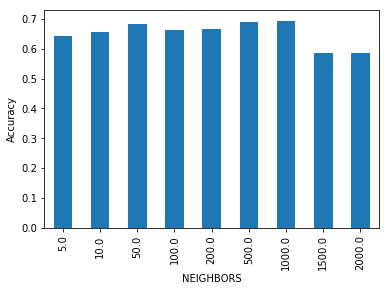

In [17]:
shitearray = [[5,10,50,100,200,500,1000,1500,2000],
             [kfc5s,kfc10s,kfc50s,kfc100s,kfc200s,kfc500s,kfc1000s,kfc1500s,kfc2000s]]
shitedf = pd.DataFrame(shitearray).T
ax = shitedf[1].plot(kind='bar')
ax.set_xticklabels(shitedf[0])
ax.set_xlabel("NEIGHBORS")
ax.set_ylabel("Accuracy")
plt.show()

Nyet! very high k gives bad results, probably because it's higher than the number of samples in class.

### ========== Question 2.11 ==========
Select best value for `k` from Questions 2.9 and 2.10 and plot the normalised confusion matrix on the test set. Then plot the confusion matrix for a 5-nearest neighbour classifier. What do you observe?

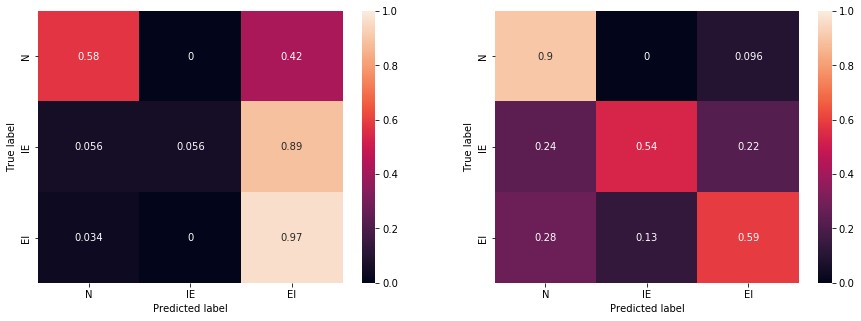

In [18]:
plt.subplots(1, 2, figsize=(15,5))

plt.subplot(121)
kfc10 = KNeighborsClassifier(n_neighbors=1000)
kfc10.fit(X_train,y_train)
kfc1000cm = confusion_matrix(y_test,kfc10.predict(X_test))
kfc1000cm_norm = kfc1000cm/kfc1000cm.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(kfc1000cm_norm, xticklabels=['N', 'IE', 'EI'], yticklabels=['N', 'IE', 'EI'],
            vmin=0., vmax=1., annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.subplot(122)
kfc = KNeighborsClassifier(n_neighbors=5)
kfc.fit(X_train,y_train)
kfc5cm = confusion_matrix(y_test,kfc.predict(X_test))
kfc5cm_norm = kfc5cm/kfc5cm.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(kfc5cm_norm, xticklabels=['N', 'IE', 'EI'], yticklabels=['N', 'IE', 'EI'],
            vmin=0., vmax=1., annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

too many predicted as EI, IE got ignored

### ========== Question 2.12 ==========
Read about the [logarithimic loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html) (or cross-entropy loss). It is often the error metric used when we are trying to optimise classification models.

This metric takes as input the true labels and the estimated probability distributions (bernouli or multinomial). It makes sense to use this metric when we are interested not only in the predicted labels, but also in the confidence with which these labels are predicted.

For instance, think of the situation where you have a single test point and two classifiers. Both classifiers predict the label correctly, however classifier A predicts tha the test point belongs to the class with probability 0.55, whereas classifier B predicts the correct class with probability 0.99. Classification accuracy would be the same for the two classifiers (why?) but the `log_loss` metric would indicate that classifier B should be favoured.

Produce a scatter plot similar to the one in Question 2.10 but this time show `log_loss` on your y axis. Which value for `k` would you pick if `log_loss` was the error metric? Comment on whether accuracy or logarithmic loss is better for selecting a model.

[3.0907788312965292, 1.0826102642659603, 0.75867982791195088, 0.78913336650512522, 0.82035137879008635, 0.85827213221348064, 0.89738411053883316, 0.92082360355662318, 0.94035369739750096]


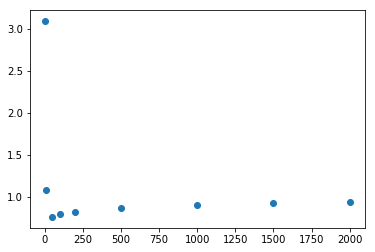

In [27]:
ks = [5,10,50,100,200,500,1000,1500,2000]
bobross = []

for k in ks:
    kfc = KNeighborsClassifier(n_neighbors=k)
    kfc.fit(X_train,y_train)
    bobross.append(log_loss(y_test,kfc.predict_proba(X_test)))
    
print(bobross)
plt.scatter(ks,bobross)
plt.show()

*Your answer goes here*

### ========== Question 2.13 ==========

Could you use the `log_loss` metric to evaluate the performance of an SVM classifier? Explain.

*Your answer goes here*